In [79]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import joblib

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [47]:
df=pd.read_csv("Fraud_detection.csv")

In [11]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [12]:
df.shape

(6362620, 11)

In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: title={'center': 'Distribution of Fraudulent Transactions'}, ylabel='count'>

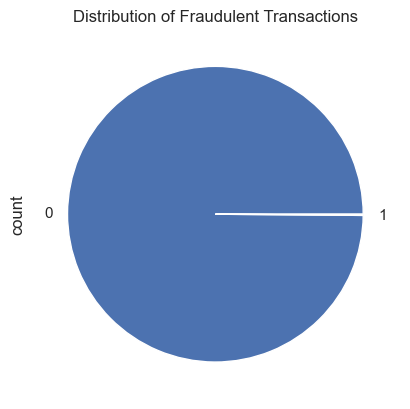

In [20]:
df.isFraud.value_counts().plot(kind='pie', color=['green', 'orange'], title='Distribution of Fraudulent Transactions')

<Axes: title={'center': 'Distribution of Transaction Types'}, xlabel='type'>

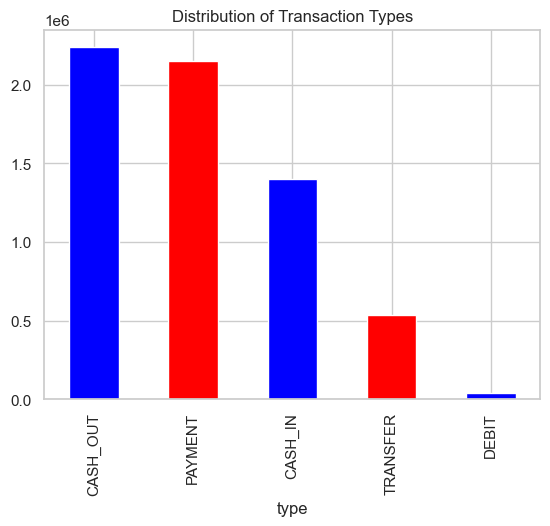

In [23]:
df['type'].value_counts().plot(kind='bar', color=['blue', 'red'], title='Distribution of Transaction Types')


<Axes: title={'center': 'Fraudulent Transactions by Type'}, xlabel='type'>

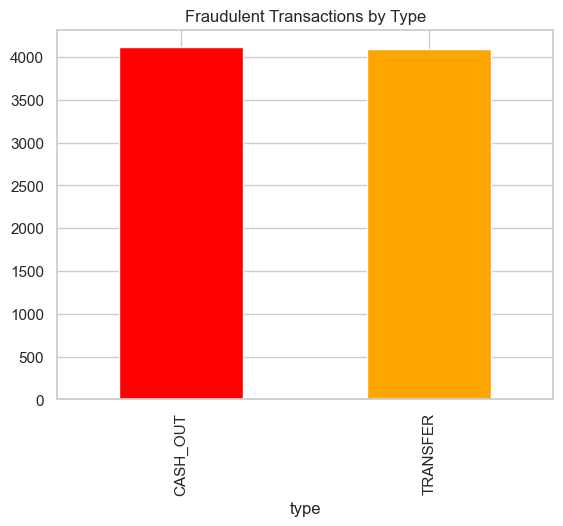

In [24]:
Fraudes_by_type = df[df['isFraud'] == 1]['type'].value_counts()
Fraudes_by_type.plot(kind='bar', color=['red', 'orange'], title='Fraudulent Transactions by Type')

<Axes: xlabel='type', ylabel='count'>

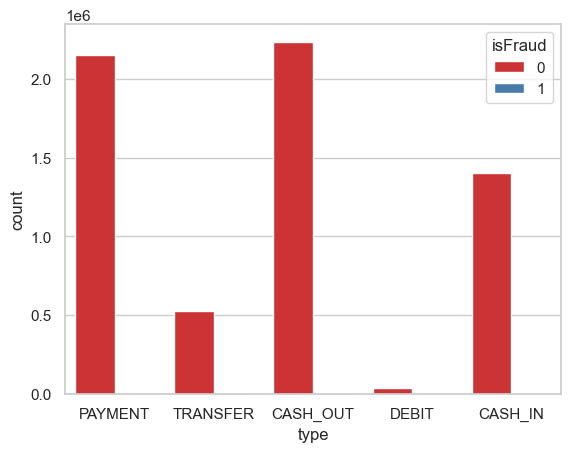

In [25]:
sns.countplot(x='type', hue='isFraud', data=df, palette='Set1')

<Axes: xlabel='amount', ylabel='Count'>

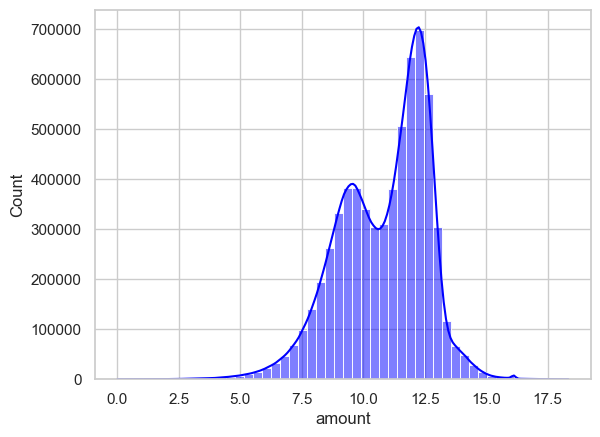

In [27]:
sns.histplot(np.log1p(df['amount']), bins=50, kde=True, color='blue')

<Axes: xlabel='type', ylabel='amount'>

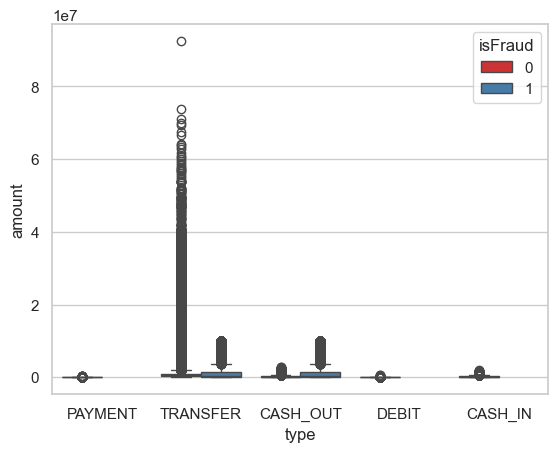

In [28]:
sns.boxplot(x='type', y='amount', hue='isFraud', data=df, palette='Set1')

In [29]:
df['balanceDiffOrig']= df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest']= df['oldbalanceDest'] - df['newbalanceDest']

In [30]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

<Axes: title={'center': 'Fraudulent Transactions per Step'}, xlabel='step'>

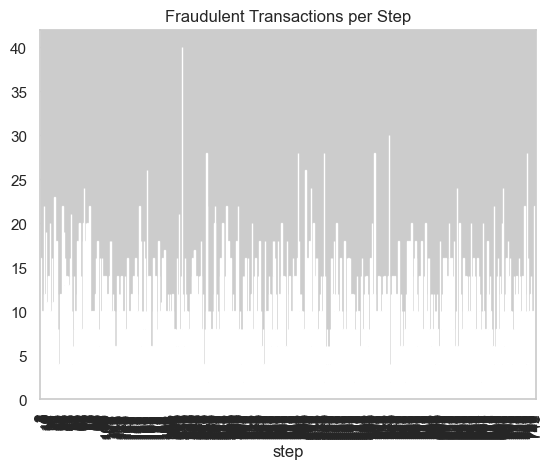

In [32]:
frauds_per_step=df[df['isFraud'] == 1].groupby('step').size()
frauds_per_step.plot(kind='bar', color='black', title='Fraudulent Transactions per Step')

In [33]:
df.drop(columns='step',inplace=True)

<Axes: title={'center': 'Top 10 Fraudulent Senders'}, xlabel='nameOrig'>

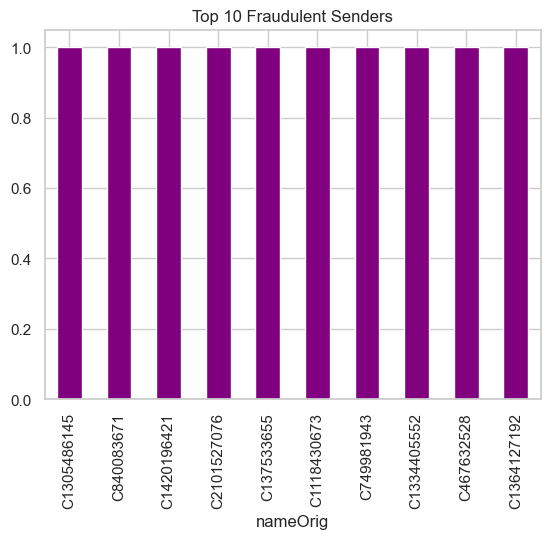

In [34]:
top_senders = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
top_senders.plot(kind='bar', color='purple', title='Top 10 Fraudulent Senders')

<Axes: title={'center': 'Top 10 Fraudulent Recipients'}, xlabel='nameOrig'>

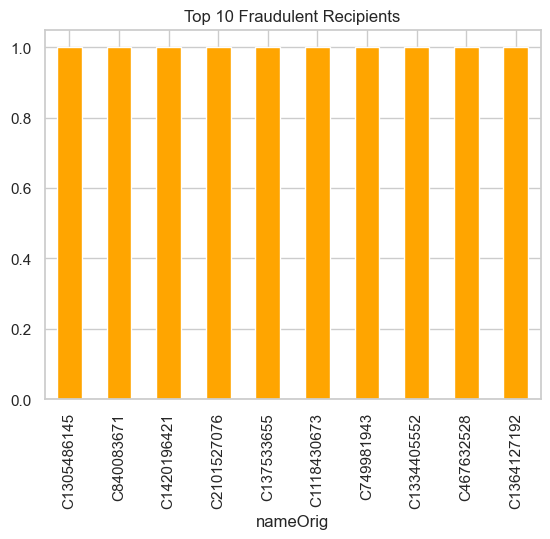

In [37]:
fraud_users= df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
fraud_users.plot(kind='bar', color='orange', title='Top 10 Fraudulent Recipients')

<Axes: title={'center': 'Fraudulent Transactions by Type'}, xlabel='type'>

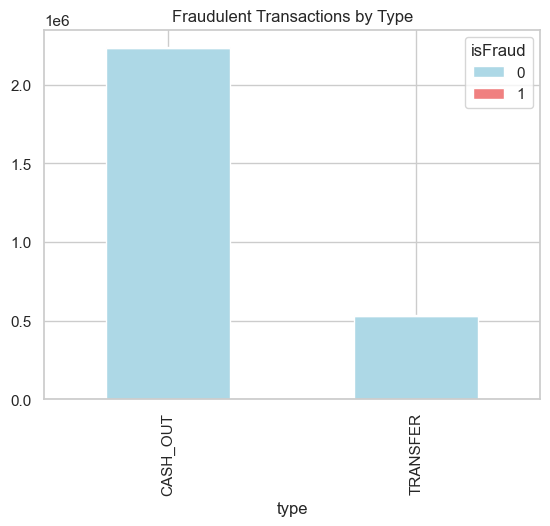

In [38]:
fraud_types=df[df['type'].isin(['CASH_OUT', 'TRANSFER'])].groupby('type')['isFraud'].value_counts().unstack()
fraud_types.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], title='Fraudulent Transactions by Type')

<Axes: >

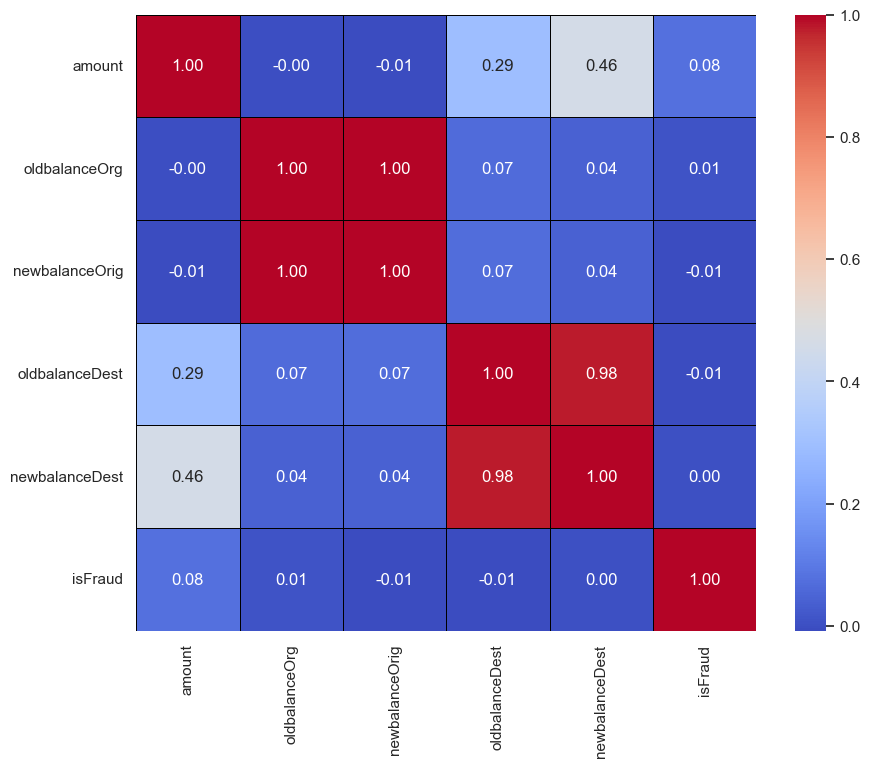

In [40]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

In [41]:
zero_after_transfert=df[(df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0) & (df['type'].isin(['TRANSFER', 'CASH_OUT']))]

In [42]:
len(zero_after_transfert)

1188074

In [48]:
df= df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'],axis=1)

In [49]:
Y=df['isFraud']
X=df.drop(columns='isFraud',axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [55]:
preprosesor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']),
        ('cat', OneHotEncoder(drop='first'), ['type'])
    ],
    remainder='drop'
)


In [70]:
pipeline= Pipeline([
    ("prep",preprosesor),
      ("clef",LogisticRegression(max_iter=1000,class_weight='balanced'))
])

In [71]:
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('clef', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:
Y_predict=pipeline.predict(X_test)

In [76]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



<Axes: >

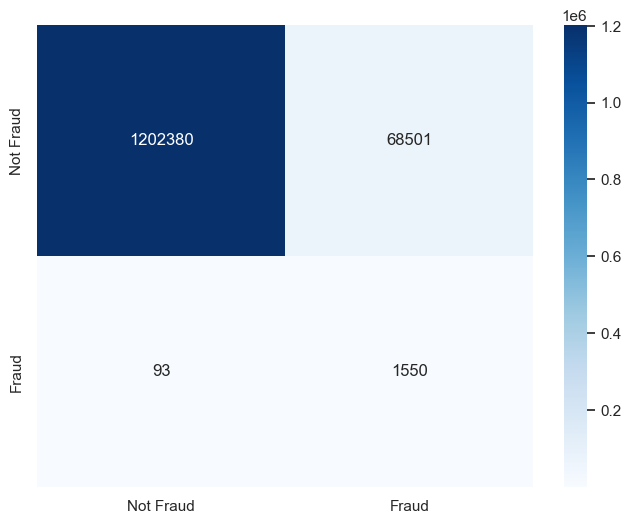

In [77]:
confusion_matrix = confusion_matrix(y_test, Y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

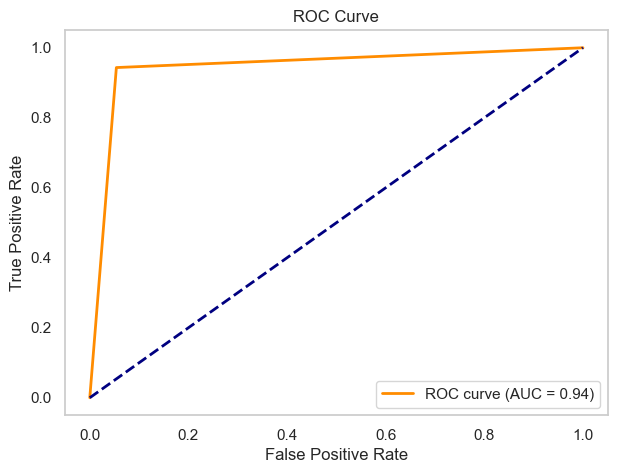

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

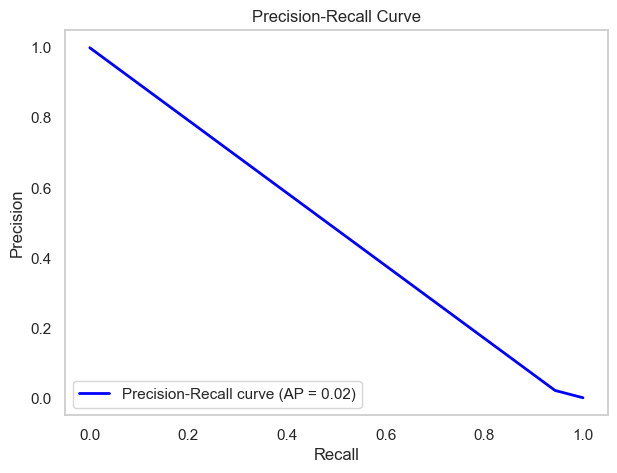

In [83]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, Y_predict)
average_precision = average_precision_score(y_test, Y_predict)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [78]:
pipeline.score(X_test, y_test)

0.9460961050636373

In [80]:
joblib.dump(pipeline, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']